In [71]:
from openpyxl import load_workbook
import pandas as pd

file_path = 'WEOOct2020all.xlsx'

workbook = load_workbook(filename=file_path, data_only=True)

sheet = workbook[workbook.sheetnames[0]]

data_rows = []
for row in sheet.iter_rows(min_row=2, max_row=sheet.max_row, max_col=sheet.max_column):
    try:
        row_data = [cell.value for cell in row]
        split_data = [data.split('\t') if data is not None else [] for data in row_data]

        row_list = []
        for data in split_data:
            if data is not None:
                row_list.extend(data)  

        data_rows.append(row_list)
    except AttributeError as e:
        print("Warning: ", e)  

column_names = ['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country', 'Subject Descriptor', 'Subject Notes', 'Units', 'Scale', 'Country/Series-specific Notes']
years = [str(year) for year in range(1977, 2023)]
# extra_columns = ['Extra' + str(i) for i in range(1, sheet.max_column - len(column_names) - len(years))]

all_column_names = column_names + years + ['Estimates Start After']

df = pd.DataFrame(data_rows)
df = df.iloc[:8660, 0:56]
df.columns = all_column_names

df['Country/Series-specific Notes'] = df[['Country/Series-specific Notes', '1977', '1978', '1979']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df = df.drop(columns=['1977', '1978', '1979'])

df.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,Gross domestic product,constant prices,Expressed in billions of national currency uni...,less the f.o.b. value of imports of goods and...,National currency Billions Source: National St...,n/a,...,1,154.178,1,185.306,1,197.012,1,222.917,1,255.288
1,512,AFG,NGDP_RPCH,Afghanistan,Gross domestic product,constant prices,Annual percentages of constant price GDP are y...,less the f.o.b. value of imports of goods and...,Percent change See notes for: Gross domestic...,n/a,...,2.697,0.988,2.164,2.647,1.189,3.912,-5.000,4.000,4.524,4.500
2,512,AFG,NGDP,Afghanistan,Gross domestic product,current prices,Expressed in billions of national currency uni...,less the f.o.b. value of imports of goods and...,National currency Billions Source: National St...,n/a,...,1,116.827,1,183.039,1,226.570,1,222.917,1,285.460
3,512,AFG,NGDPD,Afghanistan,Gross domestic product,current prices,Values are based upon GDP in national currency...,less the f.o.b. value of imports of goods and...,U.S. dollars Billions See notes for: Gross do...,n/a,...,20.635,20.220,17.994,18.910,18.401,18.876,19.006,19.692,20.829,22.022
4,512,AFG,PPPGDP,Afghanistan,Gross domestic product,current prices,These data form the basis for the country weig...,please refer to one of the following sources:...,the World Bank or the Penn World Tables. F...,Box A1 in the May 2000 World Economic Outlook,...,22.521,25.969,28.190,32.808,34.739,42.209,46.304,50.334,59.945,63.784


In [72]:
df.to_csv('fixedData.csv')

In [139]:
import numpy as np
import pandas as pd

df = pd.read_csv('fixedData.csv')
df.head()

,Unnamed: 0,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Estimates Start After
0,0,512,AFG,NGDP_R,Afghanistan,Gross domestic product,constant prices,Expressed in billions of national currency uni...,less the f.o.b. value of imports of goods and...,National currency Billions Source: National St...,...,1,154.178,1,185.306,1,197.012,1,222.917,1,255.288
1,1,512,AFG,NGDP_RPCH,Afghanistan,Gross domestic product,constant prices,Annual percentages of constant price GDP are y...,less the f.o.b. value of imports of goods and...,Percent change See notes for: Gross domestic...,...,2.697,0.988,2.164,2.647,1.189,3.912,-5.000,4.000,4.524,4.500
2,2,512,AFG,NGDP,Afghanistan,Gross domestic product,current prices,Expressed in billions of national currency uni...,less the f.o.b. value of imports of goods and...,National currency Billions Source: National St...,...,1,116.827,1,183.039,1,226.570,1,222.917,1,285.460
3,3,512,AFG,NGDPD,Afghanistan,Gross domestic product,current prices,Values are based upon GDP in national currency...,less the f.o.b. value of imports of goods and...,U.S. dollars Billions See notes for: Gross do...,...,20.635,20.220,17.994,18.910,18.401,18.876,19.006,19.692,20.829,22.022
4,4,512,AFG,PPPGDP,Afghanistan,Gross domestic product,current prices,These data form the basis for the country weig...,please refer to one of the following sources:...,the World Bank or the Penn World Tables. F...,...,22.521,25.969,28.190,32.808,34.739,42.209,46.304,50.334,59.945,63.784


1. Find top 10 countries that grew "Gross domestic product per capita" the most over the last decade

In [74]:
gdp_data = df[df['Subject Descriptor'] == 'Gross domestic product per capita']
gdp_data = gdp_data[gdp_data['Scale'] == 'U.S. dollars']

print(gdp_data.shape)
gdp_data.head()

(195, 54)


,Unnamed: 0,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Estimates Start After
9,9,512,AFG,NGDPDPC,Afghanistan,Gross domestic product per capita,current prices,GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units See notes for: Gross domestic product ...,...,599.349,519.219,532.220,505.909,507.290,499.441,505.827,523.013,540.522,555.893
54,54,914,ALB,NGDPDPC,Albania,Gross domestic product per capita,current prices,GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units See notes for: Gross domestic product ...,...,972.745,3,595.053,4,370.562,4,114.090,4,097.833,4
99,99,612,DZA,NGDPDPC,Algeria,Gross domestic product per capita,current prices,GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units See notes for: Gross domestic product ...,...,658.732,1,633.090,1,630.071,1,794.695,1,768.577,1
143,143,614,AGO,NGDPDPC,Angola,Gross domestic product per capita,current prices,GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units See notes for: Gross domestic product ...,...,146.802,3,641.444,4,716.253,5,245.023,5,436.516,5
188,188,311,ATG,NGDPDPC,Antigua and Barbuda,Gross domestic product per capita,current prices,GDP is expressed in current U.S. dollars per p...,U.S. dollars,Units See notes for: Gross domestic product ...,...,678.300,10,074.768,10,349.505,10,981.376,10,414.643,10


Top 10:                  Country   Growth Rate
5911   Papua New Guinea  99427.500000
7566         Tajikistan  85027.900000
7027        South Sudan  35806.200000
7654           Thailand  11457.135471
2190            Ecuador   2349.297064
7699        Timor-Leste   2159.579851
3127             Guyana   2063.580648
6089             Poland   1580.991011
5417        Netherlands   1084.959794
1744  Republic of Congo   1069.065288


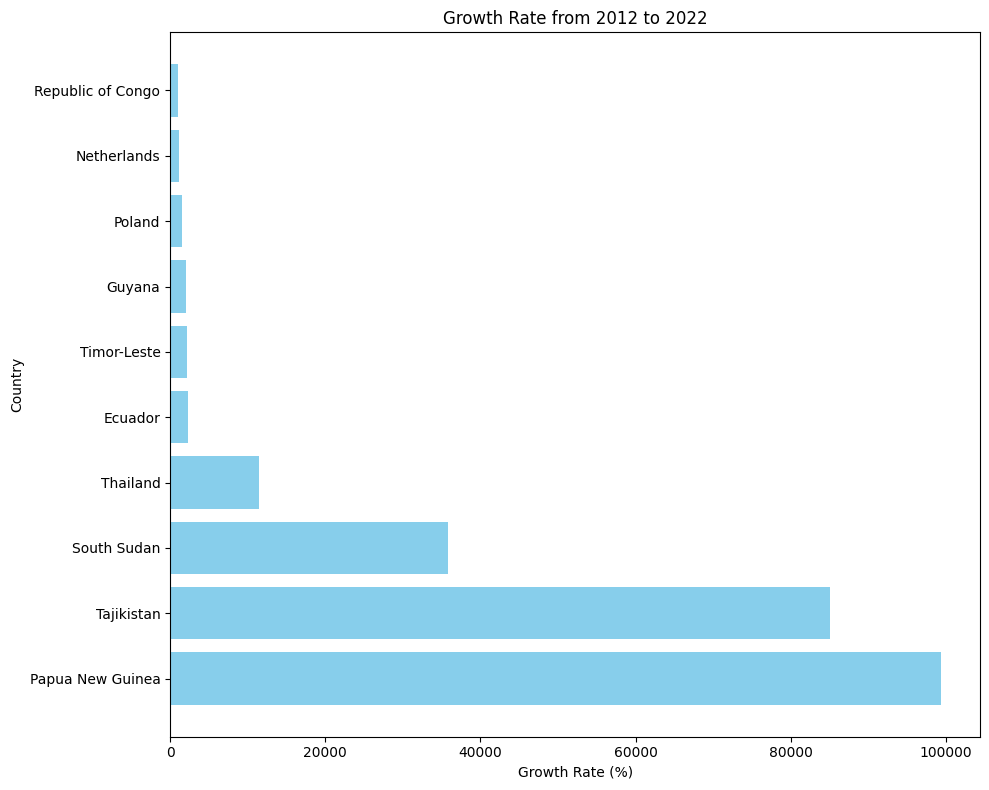

In [76]:
import matplotlib.pyplot as plt

first_year_col = '2012'
last_year_col = '2022'

gdp_data[first_year_col] = pd.to_numeric(gdp_data[first_year_col], errors='coerce')
gdp_data[last_year_col] = pd.to_numeric(gdp_data[last_year_col], errors='coerce')

gdp_data['Growth Rate'] = (gdp_data[last_year_col] / gdp_data[first_year_col] - 1) * 100
top10 = gdp_data.nlargest(10, 'Growth Rate')

print("Top 10: ", top10[['Country', 'Growth Rate']])

countries = top10['Country']
growth_rates = top10['Growth Rate']

plt.figure(figsize=(10,8))
plt.barh(countries, growth_rates, color='skyblue')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Country')
plt.title('Growth Rate from {} to {}'.format(first_year_col, last_year_col))

plt.tight_layout()
plt.show()

2. Draw OECD countries' "Population" growth over the last decade

In [77]:
oecd_list = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 
    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 
    'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 
    'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 
    'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 
    'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'USA'
]

population_data = df[df['Subject Descriptor'] == 'Population']
oecd_data = population_data[population_data['Country'].isin(oecd_list)]

oecd_data.head()

,Unnamed: 0,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Estimates Start After
381,381,193,AUS,LP,Australia,Population,For census purposes,the total population of the country consists ...,the total may comprise either all usual resid...,Revision 1 paragraph 2.42] Persons Millions,...,23.298,23.640,23.985,24.390,24.773,25.172,25.522,25.724,25.875,26.119
426,426,122,AUT,LP,Austria,Population,For census purposes,the total population of the country consists ...,the total may comprise either all usual resid...,Revision 1 paragraph 2.42] Persons Millions,...,8.477,8.544,8.630,8.740,8.815,8.885,8.859,8.901,8.946,8.990
741,741,124,BEL,LP,Belgium,Population,For census purposes,the total population of the country consists ...,the total may comprise either all usual resid...,Revision 1 paragraph 2.42] Persons Millions,...,11.138,11.181,11.237,11.311,11.352,11.399,11.456,11.490,11.524,11.573
1411,1411,156,CAN,LP,Canada,Population,For census purposes,the total population of the country consists ...,the total may comprise either all usual resid...,Revision 1 paragraph 2.42] Persons Millions,...,35.034,35.392,35.678,36.052,36.492,36.994,37.527,38.029,38.435,38.849
1544,1544,228,CHL,LP,Chile,Population,For census purposes,the total population of the country consists ...,the total may comprise either all usual resid...,Revision 1 paragraph 2.42] Persons Millions,...,17.612,17.788,17.971,18.167,18.419,18.751,19.107,19.458,19.718,19.923


/tmp/ipykernel_24274/728682572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oecd_data[first_year_col] = pd.to_numeric(oecd_data[first_year_col], errors='coerce')
/tmp/ipykernel_24274/728682572.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oecd_data[last_year_col] = pd.to_numeric(oecd_data[last_year_col], errors='coerce')
/tmp/ipykernel_24274/728682572.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

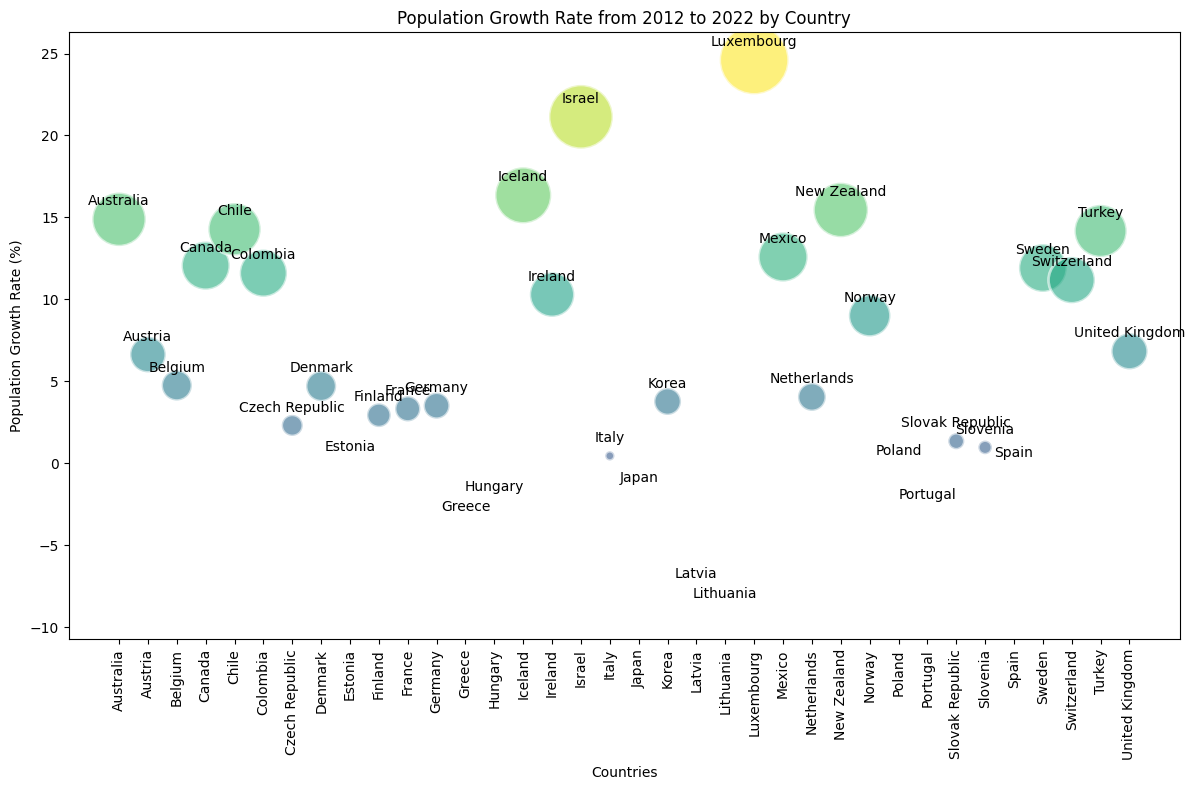

In [78]:
import matplotlib.pyplot as plt

first_year_col = '2012'
last_year_col = '2022'

oecd_data[first_year_col] = pd.to_numeric(oecd_data[first_year_col], errors='coerce')
oecd_data[last_year_col] = pd.to_numeric(oecd_data[last_year_col], errors='coerce')

oecd_data['Population Growth Rate'] = (oecd_data[last_year_col] / oecd_data[first_year_col] - 1) * 100

countries = oecd_data['Country']
growth_rates = oecd_data['Population Growth Rate']
bubble_sizes = growth_rates * 100 

colors = growth_rates - growth_rates.min()  
colors = colors / colors.max()  

plt.figure(figsize=(12, 8))
scatter = plt.scatter(np.arange(len(countries)), growth_rates, s=bubble_sizes, c=colors, cmap='viridis', alpha=0.6, edgecolors="w", linewidth=2)

plt.xlabel('Countries')
plt.ylabel('Population Growth Rate (%)')
plt.title('Population Growth Rate from {} to {} by Country'.format(first_year_col, last_year_col))
plt.xticks(np.arange(len(countries)), countries, rotation=90) 
plt.tight_layout()

for i, country in enumerate(countries):
    plt.annotate(country, (i, growth_rates.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

3. Save the GDP growth figures in separate charts and save them as PNG files --> Charts were saved

4. Create 5 clusters out of the countries using GDP and "Volume of exports of goods"

/home/kursat/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Netherlands
Papua New Guinea
Poland
Ethiopia
St. Kitts and Nevis


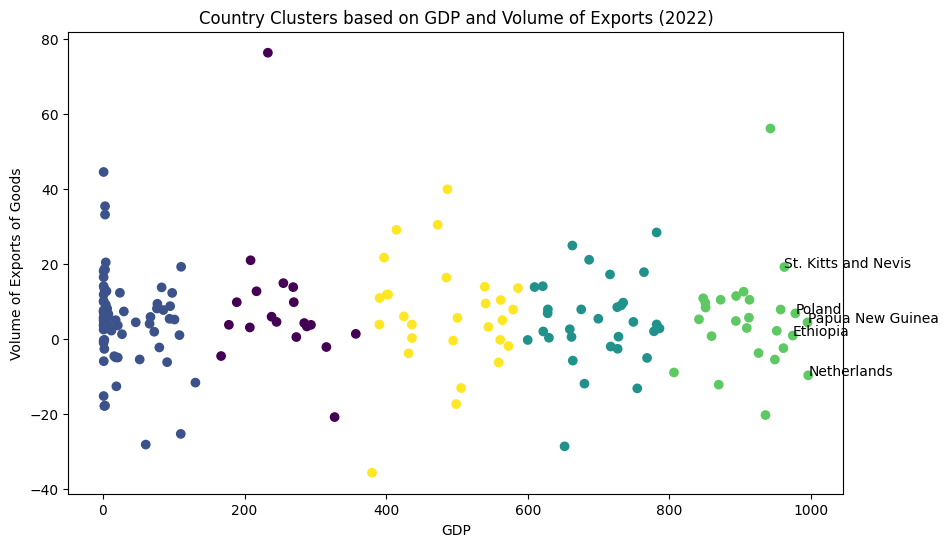

In [80]:
from sklearn.cluster import KMeans

gdp_data = df[df['Subject Descriptor'] == 'Gross domestic product per capita']
gdp_data = gdp_data[gdp_data['Scale'] == 'U.S. dollars']

volume_data = df[df['Subject Descriptor'] == 'Volume of exports of goods']

df_combined = pd.merge(gdp_data, volume_data, on='Country', suffixes=('_gdp', '_exports'))

year = '2022'
gdp_col = year + '_gdp'
exports_col = year + '_exports'

df_combined[gdp_col] = pd.to_numeric(df_combined[gdp_col], errors='coerce')
df_combined[exports_col] = pd.to_numeric(df_combined[exports_col], errors='coerce')

df_combined = df_combined.dropna(subset=[gdp_col, exports_col])

X = df_combined[[gdp_col, exports_col]].values

kmeans = KMeans(n_clusters=5, random_state=42)
df_combined['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df_combined[gdp_col], df_combined[exports_col], c=df_combined['Cluster'], cmap='viridis')
plt.xlabel('GDP')
plt.ylabel('Volume of Exports of Goods')
plt.title('Country Clusters based on GDP and Volume of Exports ({})'.format(year))

top_countries = df_combined.nlargest(5, gdp_col)
for _, row in top_countries.iterrows():
    print(row['Country'])
    plt.text(row[gdp_col], row[exports_col], row['Country'])

plt.show()


5. Find all the data fields from the year 2015 that are present in most of the countries

In [83]:
column_names = ['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country', 
                'Subject Descriptor', 'Subject Notes', 'Units', 'Scale', 
                'Country/Series-specific Notes', 'Estimates Start After',
                '2015']


df_2015 = df[column_names]

non_missing_counts = df_2015.count() - 1 

threshold = len(df) * 0.98

fields_in_most_countries = non_missing_counts[non_missing_counts >= threshold].index.tolist()

print("Fields from 2015 present in most of the countries:", fields_in_most_countries)


Fields from 2015 present in most of the countries: ['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country', 'Subject Descriptor', 'Units', 'Country/Series-specific Notes']


6. Create a predictor (use scikit) to predict GDP per capita (exclude other GDP-related fields). 

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import joblib

gdp_data = df[df['Subject Descriptor'] == 'Gross domestic product per capita']
gdp_data = gdp_data[gdp_data['Scale'] == 'U.S. dollars']

gdp_data = gdp_data.iloc[:, 10:55]
gdp_data = gdp_data.dropna()

scaler = MinMaxScaler()
norm_data = scaler.fit_transform(gdp_data)

print(gdp_data.shape)

X = norm_data[:, :43] # numaralar değişecek
Y = norm_data[:, 43:44]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = AdaBoostRegressor()
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE: ", mse)

feature_importances = model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1][:5]

print("Top 5 most important features:")
for idx in sorted_indices:
    print(f"Feature {idx}: Importance: {feature_importances[idx]}")


top_features = X[:, sorted_indices[:5]]

x_train_top, x_test_top, y_train, y_test = train_test_split(top_features, Y, test_size=0.3, random_state=42)

top_model = AdaBoostRegressor()
top_model.fit(x_train_top, y_train.ravel())  

y_pred_top = top_model.predict(x_test_top)
mse_top = mean_squared_error(y_test, y_pred_top)

print("MSE with top 5 features: ", mse_top)

filename = 'top_model.sav'
joblib.dump(top_model, filename)


(140, 44)
MSE:  0.03767911496553596
Top 5 most important features:
Feature 39: Importance: 0.14753683906231332
Feature 41: Importance: 0.1428790444010892
Feature 37: Importance: 0.10235002901826475
Feature 31: Importance: 0.10233266463364776
Feature 8: Importance: 0.056711715391336105
MSE with top 5 features:  0.037186922327001465


/home/kursat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['top_model.sav']